# 出租车数据的集计与基础图表绘制

## 读取数据

In [1]:
#读取GPS数据
import pandas as pd
data = pd.read_csv('/home/liu/Documents/pygeo-tutorial/data-sample/TaxiData-Sample', header = None)
data.columns = ['VehicleNum', 'Stime', 'Lng', 'Lat', 'OpenStatus', 'Speed']
data.head(5)

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed
0,22271,22:54:04,114.167000,22.718399,0,0
1,22271,18:26:26,114.190598,22.647800,0,4
2,22271,18:35:18,114.201401,22.649700,0,0
3,22271,16:02:46,114.233498,22.725901,0,24
4,22271,21:41:17,114.233597,22.720900,0,19


In [2]:
TaxiOD = pd.read_csv('/home/liu/Documents/pygeo-tutorial/data-sample/TaxiOD.csv')
TaxiOD.columns = ['VehicleNum','Stime','SLng','SLat','Elng','Elat','Etime']
TaxiOD.head()

,VehicleNum,Stime,SLng,SLat,Elng,Elat,Etime
0,22223,00:03:23,114.167465,22.562468,114.225235,22.552750,00:10:48
1,22223,00:11:33,114.227150,22.554167,114.229218,22.560217,00:15:19
2,22223,00:17:13,114.231354,22.562166,114.255798,22.590967,00:29:06
3,22223,00:36:45,114.240196,22.563650,114.119965,22.566668,00:54:42
4,22223,01:01:14,114.135414,22.575933,114.166748,22.608267,01:08:17


## 每小时GPS数据量绘图
### 将需要绘制的数据算出来
该步骤主要用到df.groupby功能
我们要集计每小时的数据,那就需要由一列的内容表示数据属于哪个小时,然后以那列数据为集记.因此这里我们对data的Stime列处理,得到该时间所属的小时.


In [3]:
import time
#1.时间当成字符串,用str自带slice方法取前两位
timeflag = time.time()#返回当前时间的时间戳
data['Hour'] = data['Stime'].str.slice(0,2)#把时间当成字符串,用列自带的str方法,取前两位
#计算耗时
print('方法1',time.time()-timeflag,'s')

#2.把时间当成字符串,遍历取字符串前两位
timeflag = time.time()
data['Hour'] = data['Stime'].apply(lambda r:r[:2]) #当函数参数已经存在于一个元组或字典中时,间接地调用函数.
print('方法2',time.time()-timeflag,'s')

#3.转换为时间格式后取小时
#timeflag = time.time()
#data['Hour'] = pd.to_datetime(data['Stime']).apply(lambda r: r.hour)
#print('方法3',time.time()-timeflag,'s')

方法1 1.1978394985198975 s
方法2 0.5706005096435547 s


In [4]:
data['Hour']

0          22
1          18
2          18
3          16
4          21
           ..
1601302    20
1601303    20
1601304    20
1601305    20
1601306    20
Name: Hour, Length: 1601307, dtype: object

用df.groupby().count()计数
group的列都会变成index,所以我们用.reset_index(),将index重新变成列  

In [5]:
hourcount = data.groupby(data['Stime'].apply(lambda r:r[:2]))['VehicleNum'].count().reset_index()
hourcount.head(5)

,Stime,VehicleNum
0,00,68745
1,01,63142
2,02,60680
3,03,57494
4,04,57060


### 开始绘图
使用matplotlib包来绘制每小时GPS数据量的图表

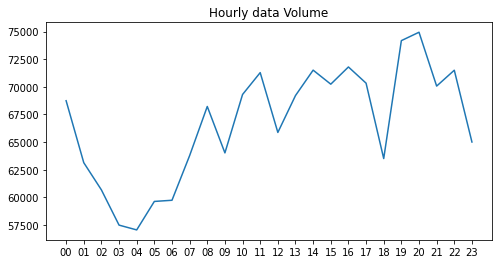

In [6]:
#一般,用matplotlib绘图的代码由3部分组成
#第一部分:创建图
import matplotlib.pyplot as plt
#创建一个图用plt.figure
#其中fig可以想象是整张图,ax是图上其中一个画板
#plt是画笔
fig = plt.figure(1,(8,4))
ax = plt.subplot(111)
#告诉画笔,我们在ax上画图
plt.sca(ax)

#第二部分:绘制
#用plt.plot画折线
plt.plot(hourcount['Stime'],hourcount['VehicleNum'])

#第三部分:调整
plt.title('Hourly data Volume')
plt.show()

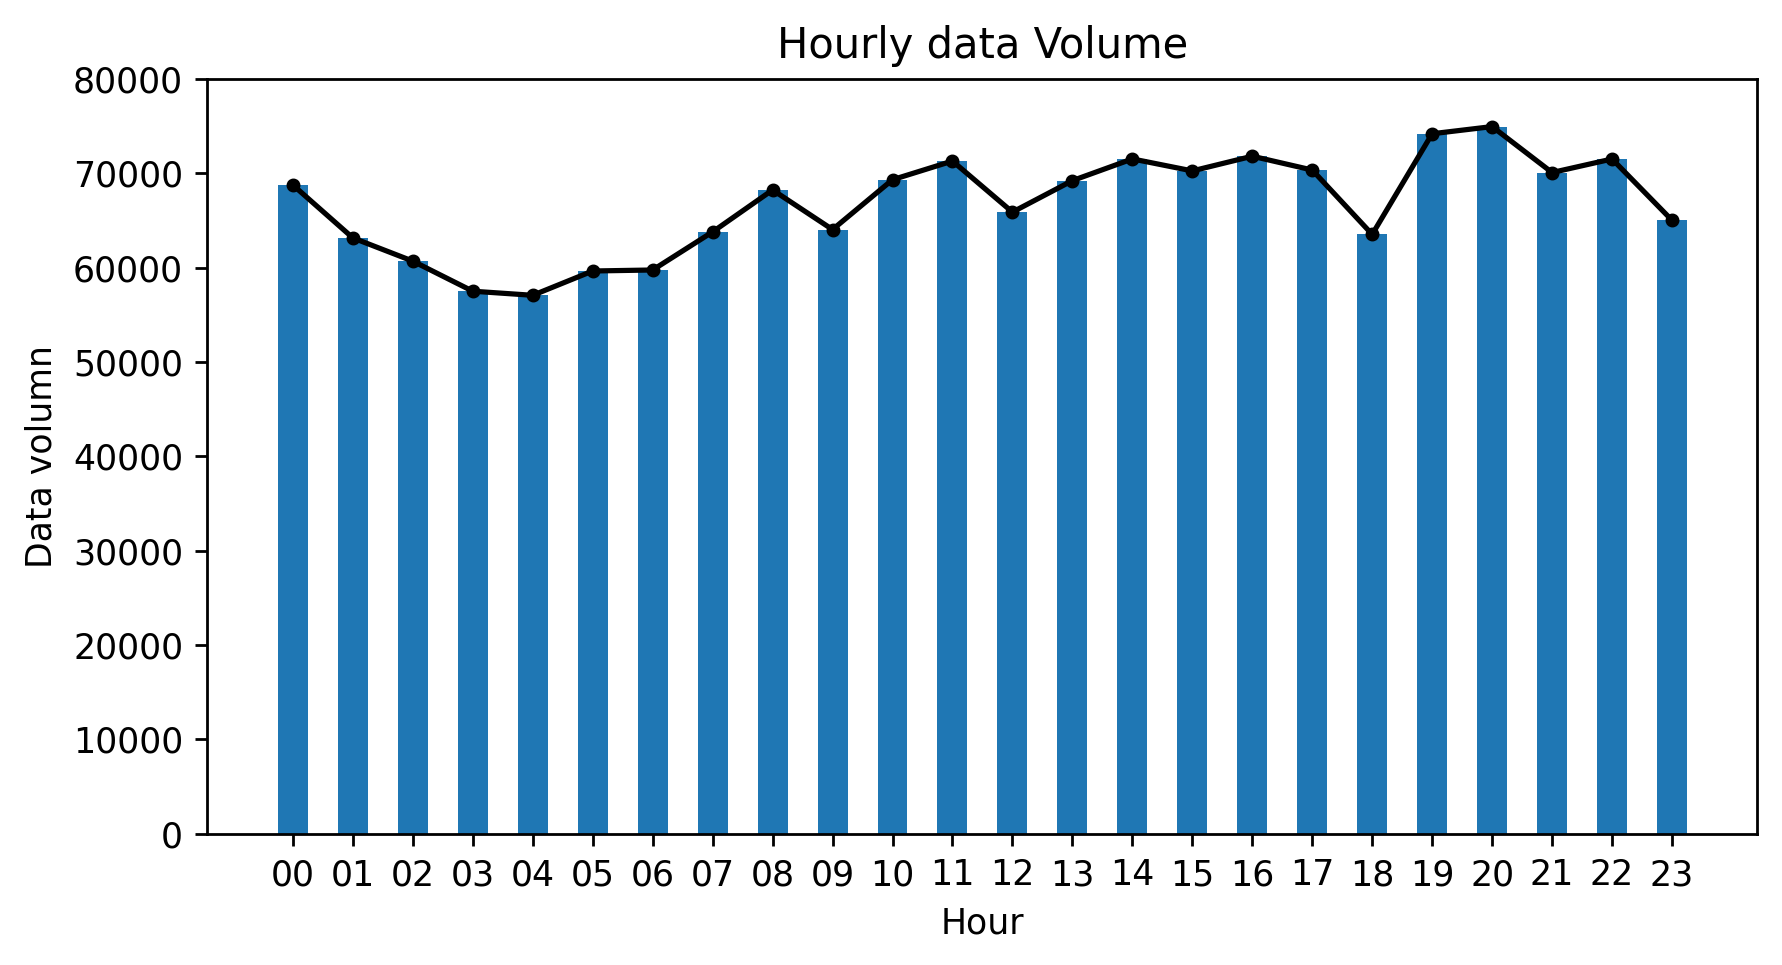

In [7]:
import matplotlib.pyplot as plt
fig     = plt.figure(1,(8,4),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

#折线图调整颜色加上数据点
plt.plot(hourcount['Stime'],hourcount['VehicleNum'],'k-',hourcount['Stime'],hourcount['VehicleNum'],'k.')
#加上条形图
plt.bar(hourcount['Stime'],hourcount['VehicleNum'],width =0.5)

plt.title('Hourly data Volume')

#把y轴起点固定在0
plt.ylim(0,80000)
plt.ylabel('Data volumn')
plt.xlabel('Hour')
plt.show()

In [20]:
TaxiOD.head(5)

,VehicleNum,Stime,SLng,SLat,Elng,Elat,Etime,order_time
0,22223,00:03:23,114.167465,22.562468,114.225235,22.552750,00:10:48,445
1,22223,00:11:33,114.227150,22.554167,114.229218,22.560217,00:15:19,226
2,22223,00:17:13,114.231354,22.562166,114.255798,22.590967,00:29:06,713
3,22223,00:36:45,114.240196,22.563650,114.119965,22.566668,00:54:42,1077
4,22223,01:01:14,114.135414,22.575933,114.166748,22.608267,01:08:17,423


In [21]:
orderNum = TaxiOD.groupby(data['Stime'].apply(lambda r:r[:2]))['Etime'].count().reset_index()

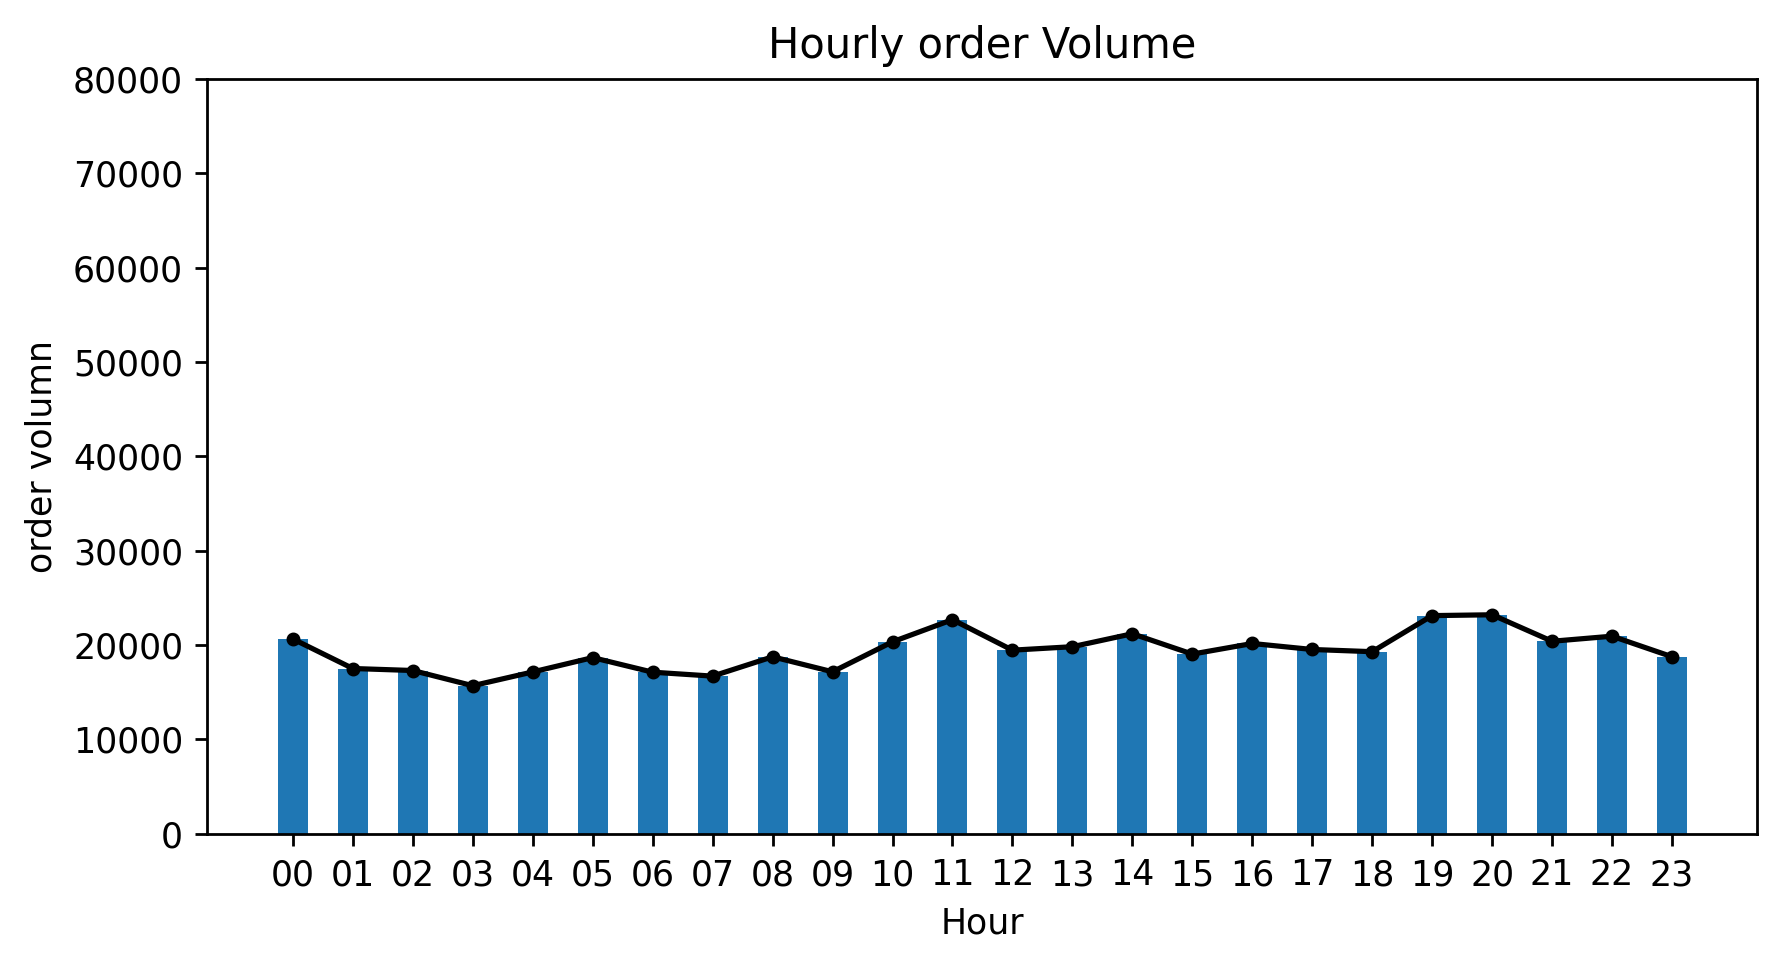

In [22]:
import matplotlib.pyplot as plt
fig     = plt.figure(1,(8,4),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

#折线图调整颜色加上数据点
plt.plot(orderNum['Stime'],orderNum['Etime'],'k-',orderNum['Stime'],orderNum['Etime'],'k.')
#加上条形图
plt.bar(orderNum['Stime'],orderNum['Etime'],width =0.5)

plt.title('Hourly order Volume')

#把y轴起点固定在0
plt.ylim(0,80000)
plt.ylabel('order volumn')
plt.xlabel('Hour')
plt.show()

## 订单的持续时间箱型图
订单的持续时间计算
这里,我想绘制一下订单的持续时间分布图,从TaxiOD来计算每个订单的持续时间吧  
我们创建一列,叫order_time,记录的是从Stime到Etime经过的时间,单位是s

In [23]:
TaxiOD = TaxiOD[-TaxiOD['Etime'].isnull()]

In [24]:
#方法1:直接硬算
TaxiOD['order_time'] = TaxiOD['Etime'].str.slice(0,2).astype('int')*3600+\
TaxiOD['Etime'].str.slice(3,5).astype('int')*60+\
TaxiOD['Etime'].str.slice(6,8).astype('int')-\
TaxiOD['Stime'].str.slice(0,2).astype('int')*3600-\
TaxiOD['Stime'].str.slice(3,5).astype('int')*60-\
TaxiOD['Stime'].str.slice(6,8).astype('int')
#方法2:转换为时间格式,相减后提取秒
#TaxiOD['order_time'] = (pd.to_datetime(TaxiOD['Etime'])-pd.to_datetime(TaxiOD['Stime']))
#TaxiOD['order_time'] = TaxiOD['order_time'].apply(lambda r:r.seconds)

### 用两种方式绘图
首先用plt.boxplot绘制全部数据分布的箱型图


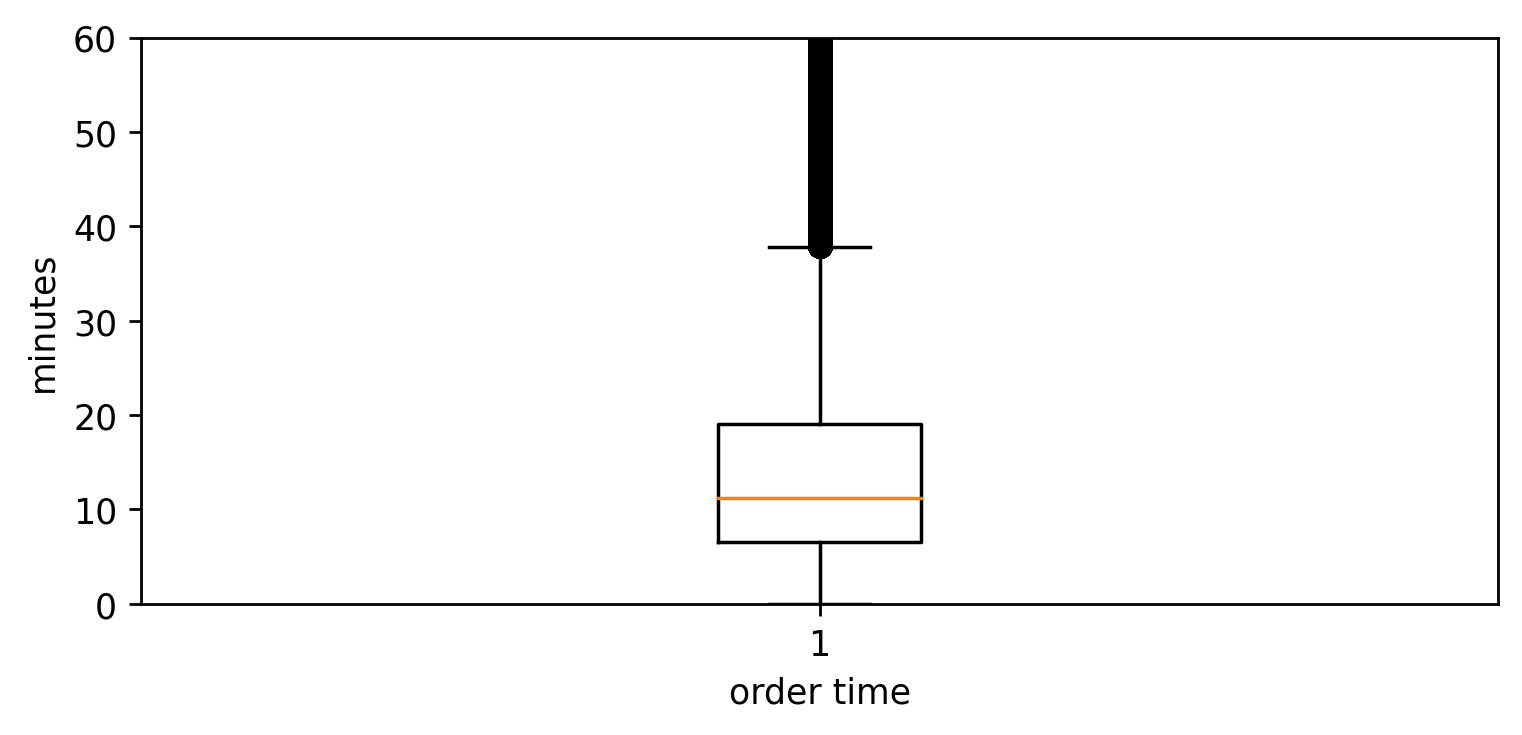

In [27]:
fig = plt.figure(1,(7,3),dpi = 250)
ax  = plt.subplot(111)
plt.sca(ax)

plt.boxplot(TaxiOD['order_time']/60)

plt.ylabel('minutes')
plt.xlabel('order time')
plt.ylim(0,60)
plt.show()

画出每小时分组的订单时间分布

In [29]:
TaxiOD['Hour'] = TaxiOD['Stime'].str.slice(0,2)

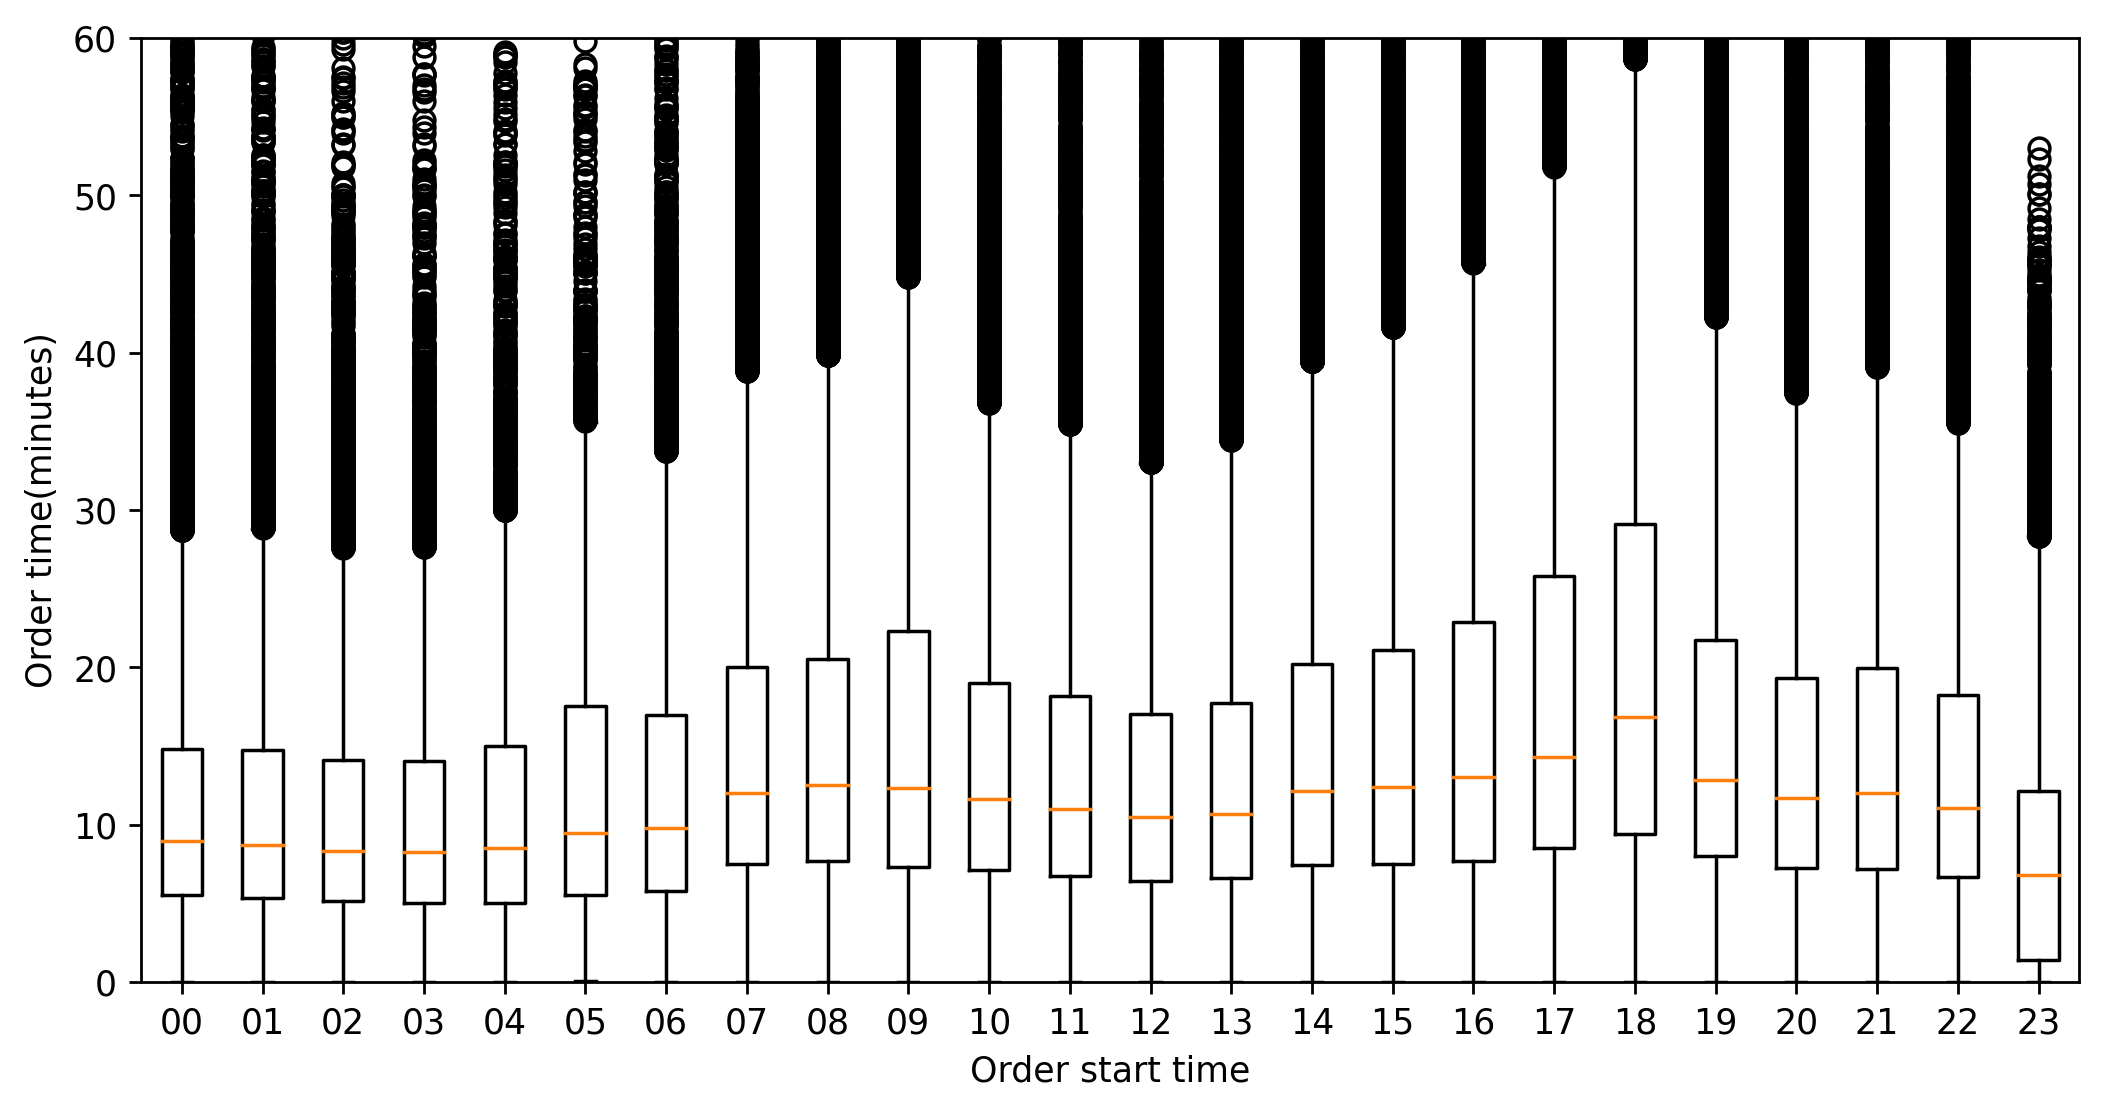

In [30]:
fig = plt.figure(1,(10,5),dpi = 250)
ax = plt.subplot(111)
plt.sca(ax)
hour = TaxiOD['Hour'].drop_duplicates().sort_values()
#drop_duplicates()函数是对df格式的数据,去除特定列下面的重复行,返回Df格式的数据
datas = []
for i in range(len(hour)):
    datas.append(TaxiOD[TaxiOD['Hour']==hour.iloc[i]]['order_time']/60)
#绘制
plt.boxplot(datas)
#更改x轴ticks的文字
plt.xticks(range(1,len(hour)+1),list(hour))
plt.ylabel('Order time(minutes)')
plt.xlabel('Order start time')
plt.ylim(0,60)
plt.show()

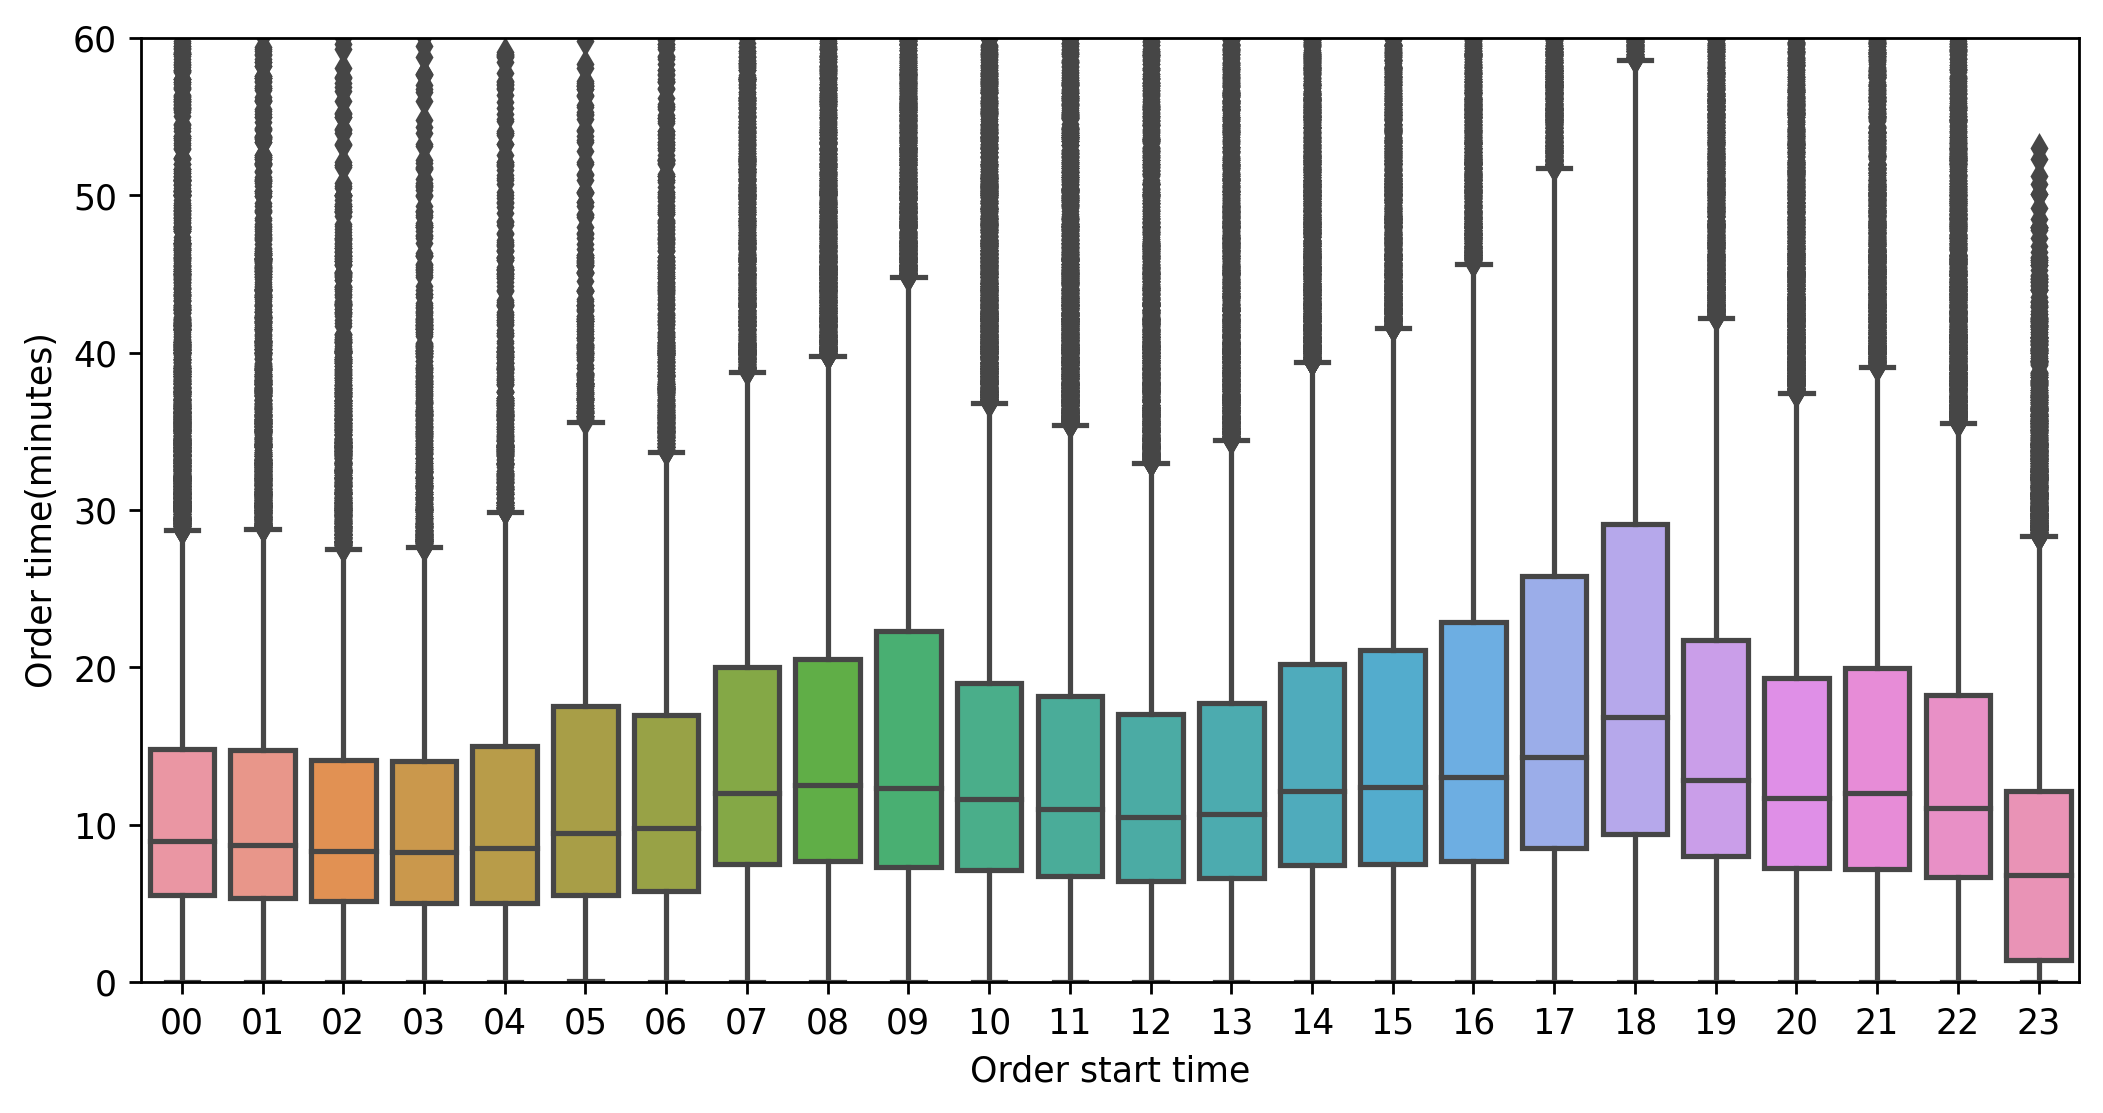

In [31]:
import seaborn as sns
fig = plt.figure(1,(10,5),dpi = 250)
ax = plt.subplot(111)
plt.sca(ax)

sns.boxplot(x = 'Hour', y = TaxiOD["order_time"]/60, data = TaxiOD, ax=ax)

plt.ylabel('Order time(minutes)')
plt.xlabel('Order start time')
plt.ylim(0,60)
plt.show()